In [ ]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [ ]:
df = pd.read_csv('weight-height.csv')

In [ ]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [ ]:
df.shape

(8555, 3)

In [ ]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


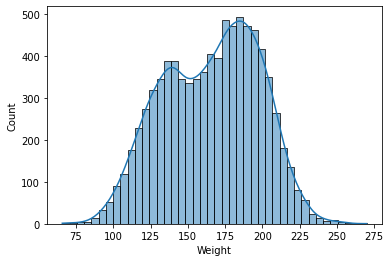

In [ ]:
sns.histplot(df['Weight'],kde=True)

In [ ]:
mean_value = df['Weight'].mean()
mean_value

165.63273532667586

In [ ]:
std_value = df['Weight'].std()
std_value

32.04392221721549

In [ ]:
#3standerd deviation right 
std_3r = mean_value + (2.5*std_value)
std_3r

245.74254086971456

In [ ]:
# 3 standerd deviation left
std_3l = mean_value - (2.5*std_value)
std_3l

85.52292978363714

In [ ]:
#outside of 3 standerd deviation left 
df[df['Weight']<std_3l]

,Gender,Height,Weight
151,Male,65.350411,65.780000
160,Male,64.333648,68.640000
5026,Female,56.547975,84.872124
5214,Female,56.785434,83.993077
5360,Female,55.668202,68.982530
5740,Female,56.108902,80.531259
6624,Female,54.616858,71.393749
6982,Female,56.764456,79.174376
7294,Female,54.873728,78.606670
7324,Female,56.810317,84.170695


In [ ]:
#outside of 3 standerd deviation right
df[df['Weight']>std_3r]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1506,Male,75.698618,249.565628
1610,Male,76.617546,255.863326
1750,Male,74.604668,249.946283
1896,Male,76.472880,246.232321
2014,Male,78.998742,269.989698
2070,Male,77.465569,252.556689
2971,Male,75.156879,250.317151
3228,Male,76.268668,247.386741
3285,Male,78.528210,253.889004


In [ ]:
remove_outlate_data = df[(df['Weight']<std_3r) & (df['Weight']>std_3l)]
remove_outlate_data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


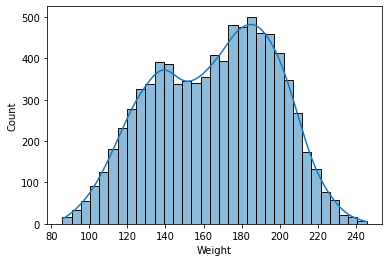

In [ ]:
sns.histplot(remove_outlate_data['Weight'],kde=True)

In [ ]:
remove_outlate_data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [ ]:
dummy_variables = pd.get_dummies(remove_outlate_data['Gender'], drop_first=True)
dummy_variables.head()

,Male
0,1
1,1
2,1
3,1
4,1


In [ ]:
new_df = remove_outlate_data.drop('Gender',axis = 1)
new_df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [ ]:
df= pd.concat([new_df,dummy_variables],axis=1)
df.head()

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


In [ ]:
x = df.drop('Height', axis=1)
y= df['Height']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=42)

x_train.shape

(5969, 2)

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
df.iloc[5841]

Height     64.090687
Weight    140.530167
Male        0.000000
Name: 5949, dtype: float64

In [ ]:
lr.coef_

array([ 0.12368722, -0.99863883])

In [ ]:
lr.intercept_

46.92063788584914

In [ ]:
#prediction of x test values
lr.predict(x_test)

array([66.21313293, 61.53372733, 63.47981906, ..., 70.37833922,
       69.94908919, 69.10116118])

In [ ]:
lr.score(x_test,y_test)

0.8535161062270603

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
pred = lr.predict(x_test)

In [ ]:
#Eroor of this model 
mean_squared_error(y_test,pred)

2.082404972379389

In [ ]:
#R2 Score of Linear 
r2_score(y_test,pred)

0.8535161062270603

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=200)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=200)

In [ ]:
predknn = knn.predict(x_test)
predknn

array([66.54182291, 61.64340659, 63.3168113 , ..., 70.33710664,
       69.99935824, 68.93669865])

In [ ]:
mean_squared_error(y_test,predknn)

2.187521256014627

In [ ]:
# R2 Sccore of KNN
r2_score(y_test,predknn)

0.8461218468346442